In [229]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [230]:
digits = datasets.load_digits()

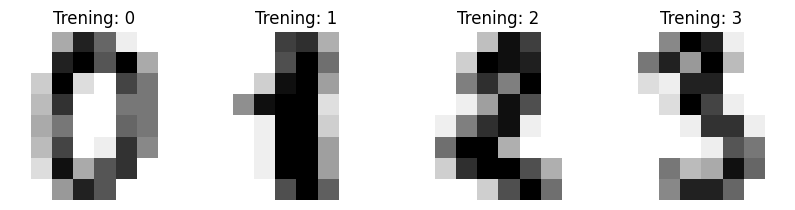

In [231]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"Trening: {label}")

In [232]:
n_samples = len(digits.images)

In [233]:
n_samples

1797

In [234]:
#klasyfikator svm
clf = svm.SVC(gamma=0.001, C=1)

In [235]:
data = digits.images.reshape((n_samples,-1))

In [236]:
X_train,X_test,y_train,y_test = train_test_split(data,digits.target,test_size=0.5,shuffle=False)
clf.fit(X_train,y_train)

,C,1
,kernel,'poly'
,degree,3
,gamma,0.001
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [237]:
predicted = clf.predict(X_test)

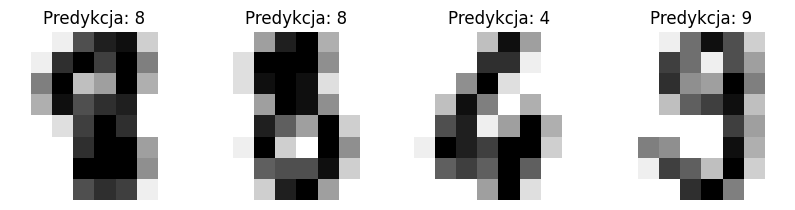

In [238]:
_, axes = plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,prediction in zip(axes,X_test,predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title(f"Predykcja: {prediction}")

In [239]:
print(f"Raport klasyfikacji dla clf: {clf}\n{metrics.classification_report(y_test,predicted)}\n")

Raport klasyfikacji dla clf: SVC(C=1, gamma=0.001, kernel='poly')
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        88
           1       0.99      0.92      0.95        91
           2       1.00      0.97      0.98        86
           3       0.94      0.89      0.92        91
           4       0.99      0.96      0.97        92
           5       0.93      0.97      0.95        91
           6       0.98      0.99      0.98        91
           7       0.97      0.98      0.97        89
           8       0.91      0.97      0.94        88
           9       0.88      0.95      0.91        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




Text(0.5, 0.98, 'Macierz pomyłek')

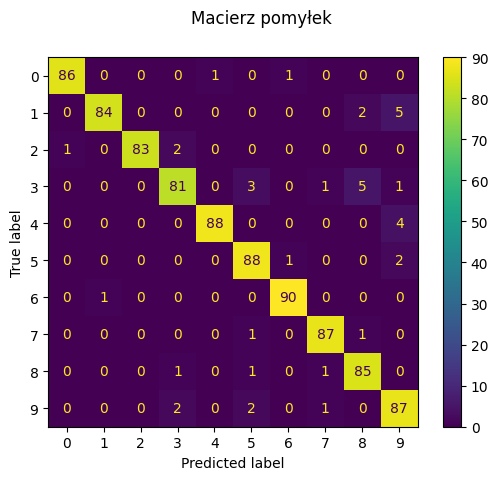

In [240]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Macierz pomyłek")